# Exercício - Séries Temporais - Suavização Exponencial

![Logo de capa](SeriesTemporais-Logo.png)

Estudante: Leonardo Simões

---
## Sumário
- [1.Introdução](#introduction)
- [2.Desenvolvimento](#development)
    * [2.1.Análise da série](#analysis)
    * [2.2.Suavização Exponencial](#model)
- [3.Conclusão](#conclusion)
- [Referências](#references)

---
<a id='introduction'></a>
## 1. Introdução

O projeto é um exercício realizado a partir do exemplo fornecido no capítulo 16 do curso citado em referências.
Aqui uma série temporal é analisada e utilizada para criar um modelo Suavização Exponencial para predição.


---
<a id='development'></a>
## 2. Desenvolvimento

Nesta seção os códigos são implementados.

In [1]:
# Verificação da versão do Python
from platform import python_version
print('Versão do Python: ', python_version())

Versão do Python:  3.11.2


In [2]:
# Imports das bibliotecas mais usadas
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Imports das bibliotecas para séries temporais e modelos
import statsmodels as stm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [4]:
# Oculta alguns alertas
import warnings
warnings.simplefilter("ignore")

In [5]:
# Versões das bibliotecas mais usadas
print('Numpy versão ' + np.__version__)
print('Pandas versão ' + pd.__version__)
print('Matplotlib versão ' + mpl.__version__)
print('Seaborn versão ' + sns.__version__)
print('Statsmodels versão ' + stm.__version__)

Numpy versão 1.23.5
Pandas versão 2.0.0
Matplotlib versão 3.7.1
Seaborn versão 0.12.2
Statsmodels versão 0.14.0


<a id='analysis'></a>
### 2.1 Análise da série

In [6]:
# Definição da função para carregar a série temporal a partir de um arquivo
def carregar_serie_temporal(arquivo, coluna_data, frequencia):
    s = pd.read_csv(arquivo, index_col=coluna_data, parse_dates=True)
    s = s.dropna()
    s = s.asfreq(frequencia)
    return s

In [7]:
# Valores de constantes para  o nome do arquivo, a coluna com data e a frequência da série
ARQUIVO = 'dataset.csv'
COLUNA_DATA = 'Data'
FREQUENCIA = 'D'

In [8]:
# Carrega a série temporal
serie = carregar_serie_temporal(ARQUIVO, COLUNA_DATA, FREQUENCIA)

In [9]:
# Exibe as 5 primeiras linhas da série temporal
serie.head()

,Total_Vendas
Data,
2023-01-01,53.483571
2023-01-02,57.176993
2023-01-03,63.087722
2023-01-04,62.103987
2023-01-05,44.690396


In [10]:
# Exibe as dimesões da série temporal
serie.shape

(365, 1)

In [11]:
# Exibe as informações gerais da série temporal
serie.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2023-01-01 to 2023-12-31
Freq: D
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total_Vendas  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [12]:
# Descreve com estatísticas a série temporal
serie.describe()

,Total_Vendas
count,365.000000
mean,59.152472
std,10.056436
min,33.265284
25%,51.496725
50%,59.165362
75%,66.610772
max,84.430251


In [13]:
# Definição da função plotar a série temporal
def plotar_serie_temporal_v1(serie_temporal):
    plt.figure(figsize = (12, 6))
    plt.plot(serie_temporal)
    plt.xlabel('Data')
    plt.ylabel('Vendas')
    plt.title('Série Temporal de Vendas')
    plt.grid(True)
    plt.show()

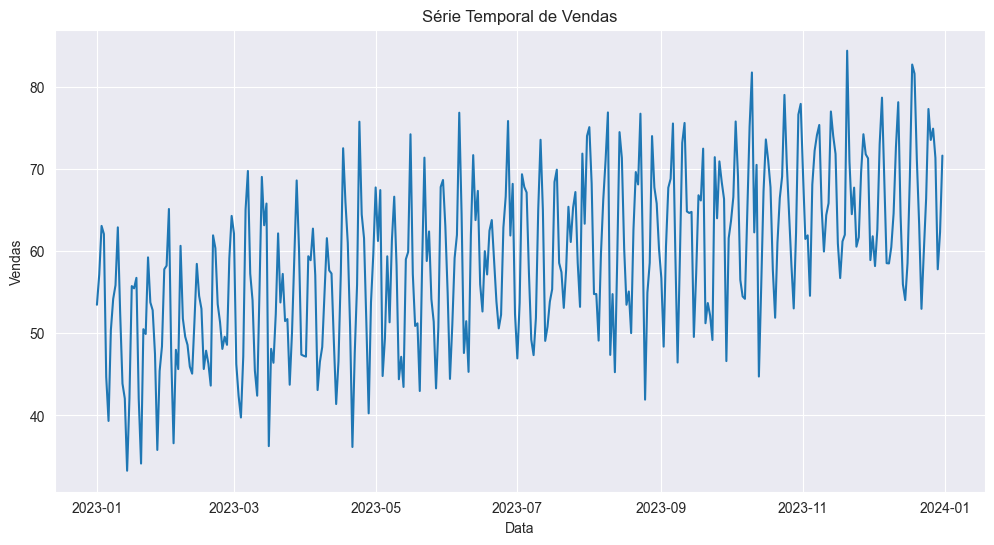

In [14]:
# Plota a série temporal
plotar_serie_temporal_v1(serie)

In [15]:
# Definição da função plotar a tendência, sazonalidade e resíduos da série temporal
def plotar_componentes_serie(s):
    decomposicao = seasonal_decompose(s)

    fig = decomposicao.plot()
    fig.set_size_inches((11, 6))
    fig.tight_layout()
    plt.show()

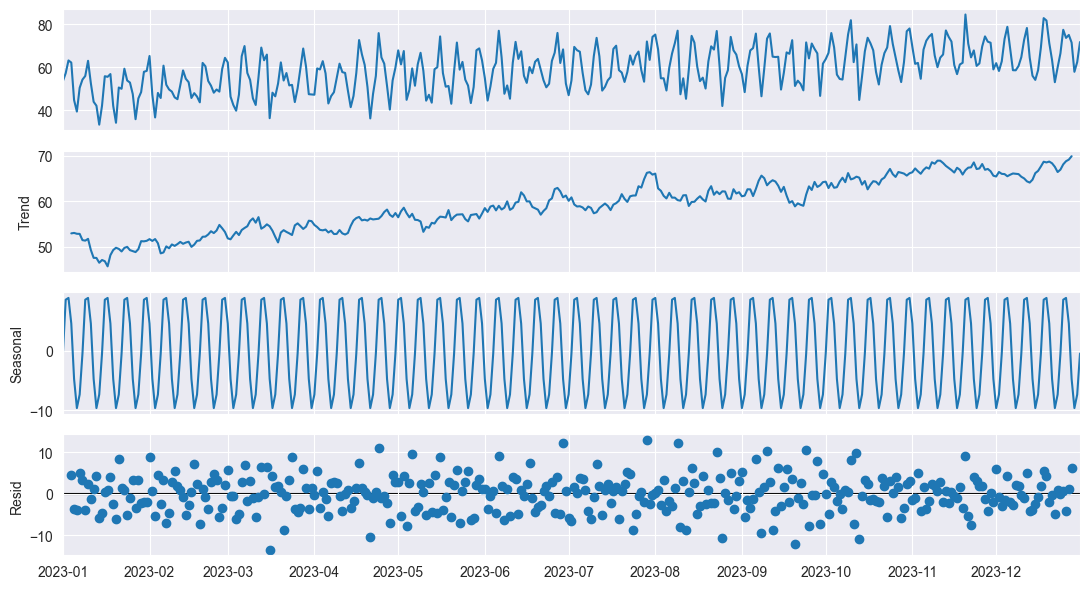

In [16]:
# Plota a tendência, sazonalidade e resíduos da série temporal
plotar_componentes_serie(serie)

<a id='model'></a>
### 2.2.Suavização Exponencial

In [17]:
# Cria o modelo
modelo = SimpleExpSmoothing(serie)

In [18]:
# Treinamento (ajuste) do modelo
# alpha = 0.2
modelo_ajustado = modelo.fit(smoothing_level = 0.2)

In [19]:
# Extrai os valores previstos pelo modelo
previsao = modelo_ajustado.fittedvalues

In [20]:
# Definição da função para plotar a série temporal e a previsão do modelo
def plotar_serie_temporal_previsao(s, p):
    plt.figure(figsize = (12, 6))
    plt.plot(s, label = 'Valores Reais')
    plt.plot(p, label = 'Valores Previstos', linestyle = '--')
    plt.xlabel('Data')
    plt.ylabel('Vendas')
    plt.title('Modelo de Suavização Exponencial')
    plt.legend()
    plt.show()

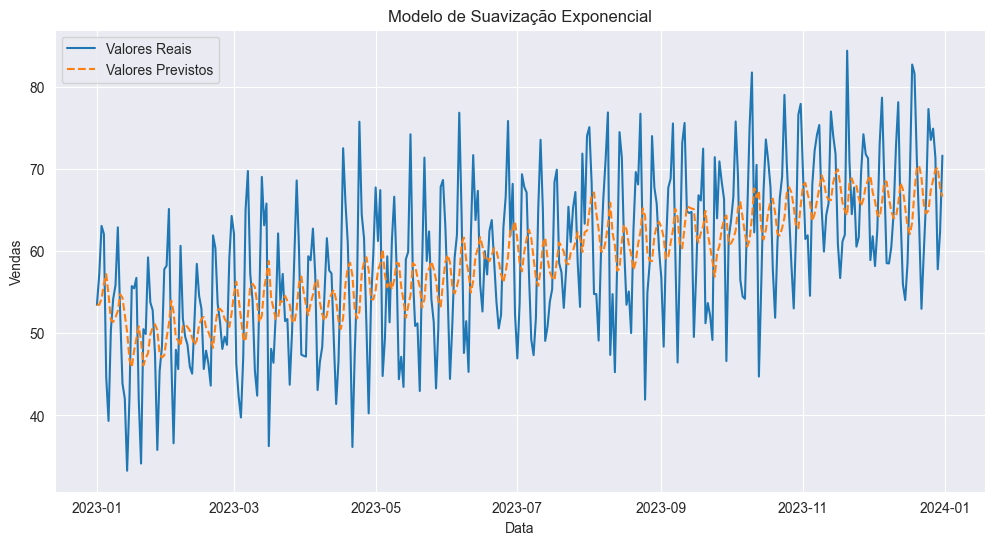

In [21]:
# Plota a série temporal e a previsão do modelo
plotar_serie_temporal_previsao(serie, previsao)

In [22]:
# Fazer previsões
numero_previsoes = 1
previsoes = modelo_ajustado.forecast(steps = numero_previsoes)

In [23]:
# Exibir resultados da previsão
print('Previsão do Total de Vendas Para Janeiro/2024:', round(previsoes[0], 4))

Previsão do Total de Vendas Para Janeiro/2024: 67.6499


---
<a id='conclusion'></a>
## 4. Conclusão

A suavização exponencial implementada em SimpleExpSmoothing, considerando o gráfico, não se ajustou tão bem aos dados da série quanto se desejava, mas consegui se adequar ao seu comportamento ainda que em amplitude ruim. Com este modelo também pode-se fazer a previsão de novos valores para a série.

---
<a id='references'></a>
## Referências

Data Science Academy - Fundamentos de Linguagem Python Para Análise de Dados e Data Science:
https://www.datascienceacademy.com.br/course/fundamentos-de-linguagem-python-para-analise-de-dados-e-data-science , Acessado em 15/05/2023.